In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h1>Internet Demographic Data Analysis</h1>
<h3>Analyst: Ian Genesis D. Minorca</h3>

In [3]:
net = pd.read_csv('Internet-Demographic.csv')
net

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


<h1 style='color:blue;'>Insight 1</h1>
<h3>Average Birth Rate by Income Group (In Order)</h3>

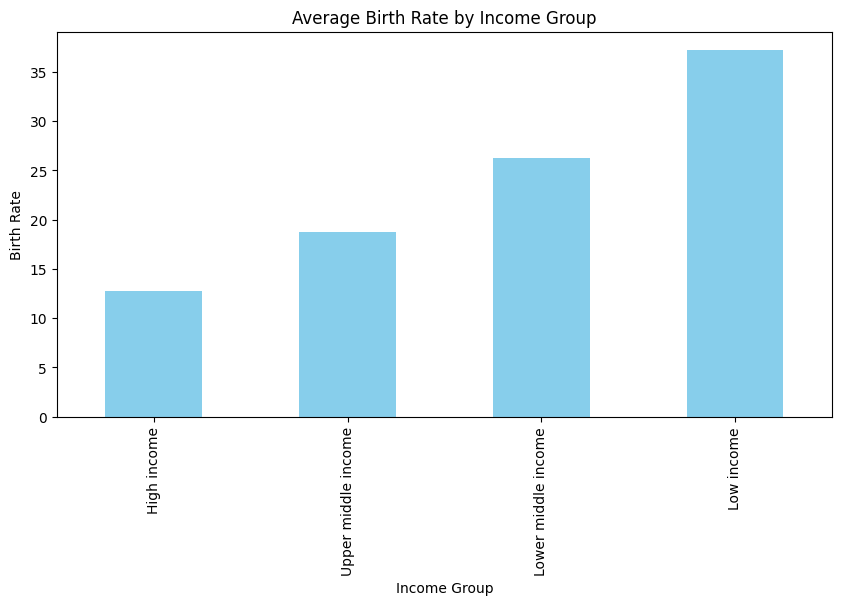

In [5]:
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
vis1 = net.groupby('Income Group')['Birth rate'].mean().reindex(income_order)
plt.figure(figsize=(10,5))
vis1.plot(kind='bar', color='skyblue')
plt.title('Average Birth Rate by Income Group')
plt.ylabel('Birth Rate')
plt.show()

<h1 style='color:blue;'>Insight 2</h1>
<h3>Income Group Percentage</h3>

<Figure size 1000x1000 with 0 Axes>

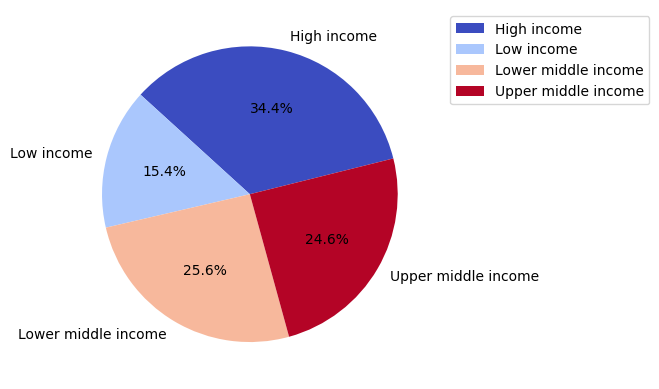

<Figure size 1000x1000 with 0 Axes>

In [23]:
vis2 = net.groupby(['Income Group']).size()
vis2.plot(kind='pie', autopct='%1.1f%%', startangle=14, cmap='coolwarm')
plt.legend(loc='upper right', bbox_to_anchor=(1.6,1))
plt.figure(figsize=(10, 10))

<h1 style='color:blue;'>Insight 3</h1>
<h3>Top 5 Countries that uses the internet</h3>

In [30]:
vis3 = net.nlargest(5, 'Internet users')[['Country Name', 'Internet users']].set_index('Country Name')
vis3

,Internet users
Country Name,
Iceland,96.5468
Bermuda,95.3000
Norway,95.0534
Sweden,94.7836
Denmark,94.6297


<h1 style='color:blue;'>Insight 4</h1>
<h3>Correlation Between Birth Rate and Internet Users</h3>

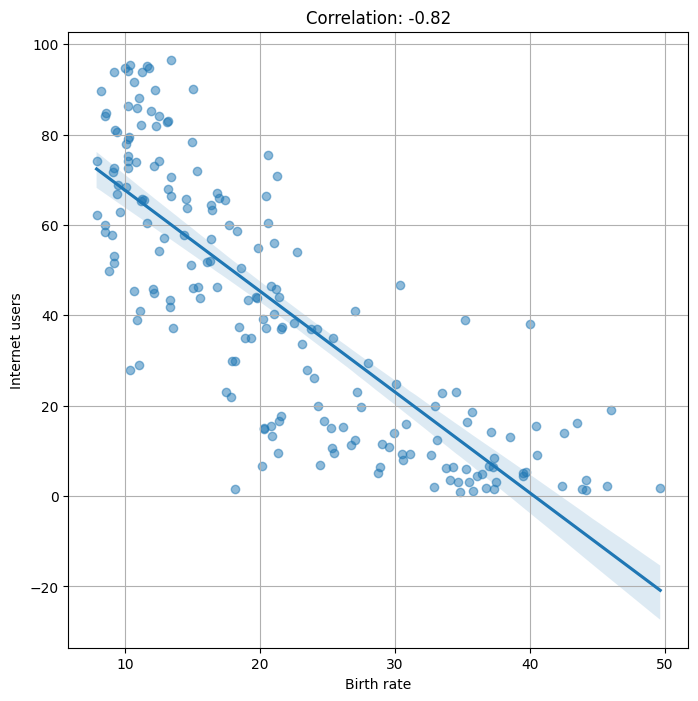

In [34]:
plt.figure(figsize=(8,8))
sns.regplot(x='Birth rate', y='Internet users', data=net, scatter_kws={'alpha':0.5})
plt.grid(True)
plt.title(f"Correlation: {net['Birth rate'].corr(net['Internet users']):.2f}")
plt.show()

<h1 style='color:blue;'>Insight 5</h1>
<h3>Internet Users Distribution Histogram</h3>

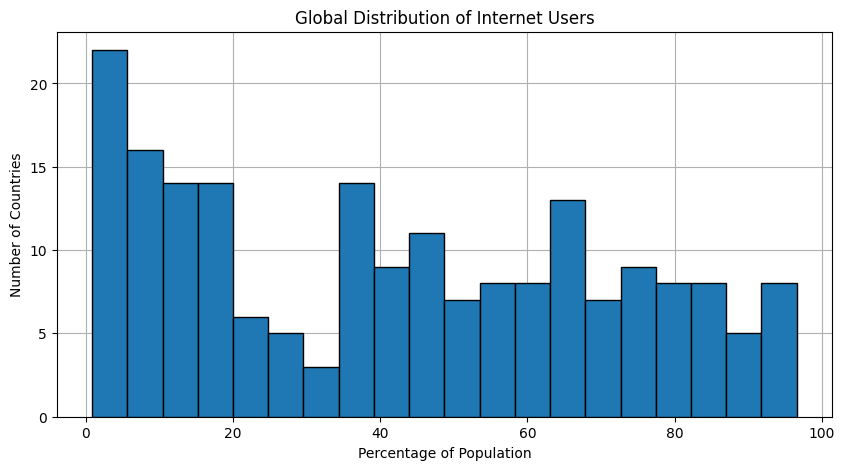

In [39]:
plt.figure(figsize=(10,5))
net['Internet users'].hist(bins=20, edgecolor='black', zorder=3)
plt.title('Global Distribution of Internet Users')
plt.grid(True, zorder=0)
plt.xlabel('Percentage of Population')
plt.ylabel('Number of Countries')
plt.show()

<h1 style='color:blue;'>Insight 6</h1>
<h3>Birth Rate vs Internet Users by Income Group Using Scatterplot</h3>

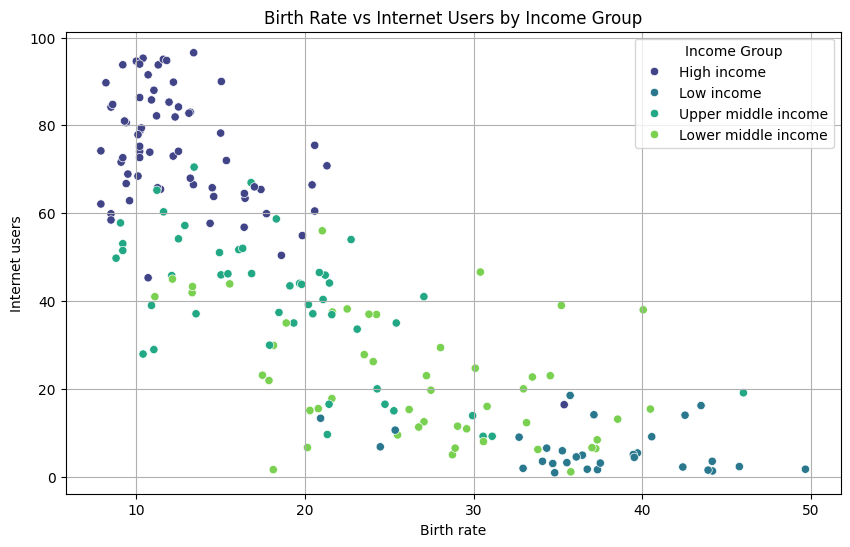

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Birth rate', y='Internet users', hue='Income Group', data=net, palette='viridis')
plt.title('Birth Rate vs Internet Users by Income Group')
plt.grid(True)
plt.show()

<h1 style='color:blue;'>Insight 7</h1>
<h3>Deep below and the lowest internet user countries</h3>

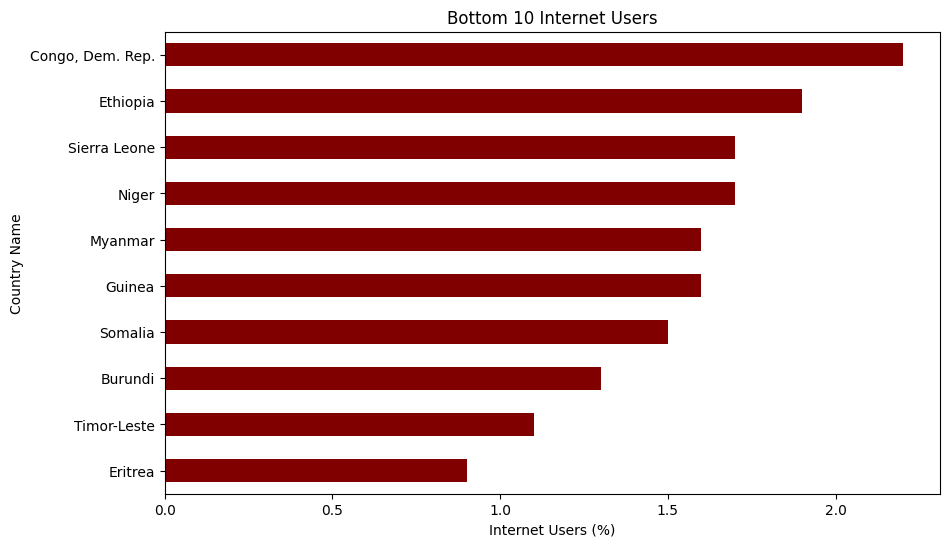

In [52]:
net.nsmallest(10, 'Internet users').set_index('Country Name')['Internet users'].plot( kind='barh', title='Bottom 10 Internet Users', figsize=(10,6), color='maroon')
plt.xlabel('Internet Users (%)')
plt.show()

<h1 style='color:blue;'>Insight 8</h1>
<h3>Birth Rate Distribution by Income Group</h3>

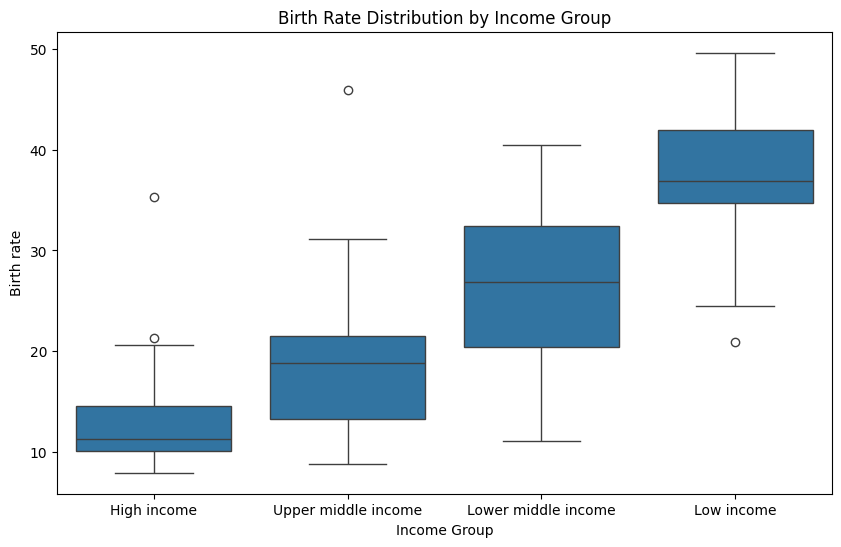

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Income Group', y='Birth rate', data=net, order=income_order)
plt.title('Birth Rate Distribution by Income Group')
plt.show()

<h1 style='color:blue;'>Insight 9</h1>
<h3>Correlation Between Internet Users and Birth Rate</h3>

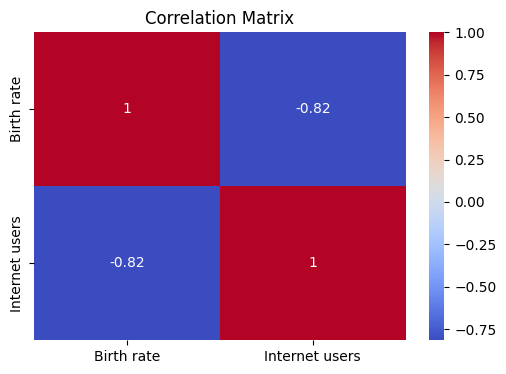

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(net[['Birth rate', 'Internet users']].corr(), annot=True, cmap='coolwarm')
plt.figsize=(10,8)
plt.title('Correlation Matrix')
plt.show()

<h1 style='color:blue;'>Insight 10 & 11</h1>
<h3>Density of Birth Rate & Internet Users</h3>

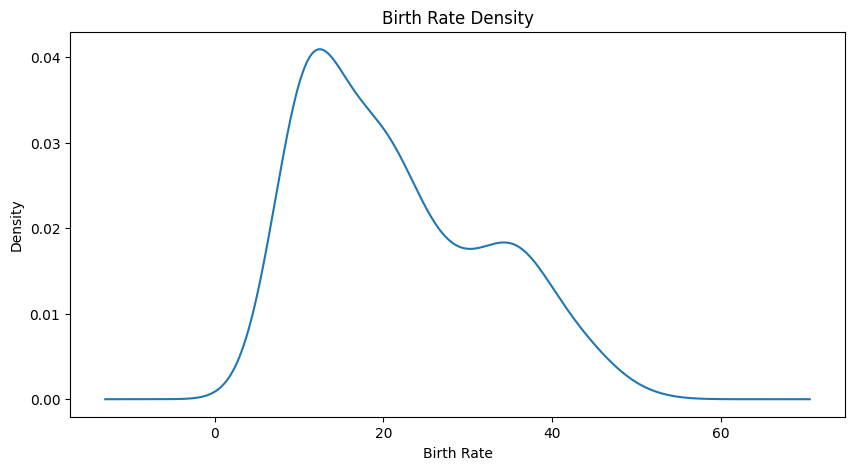

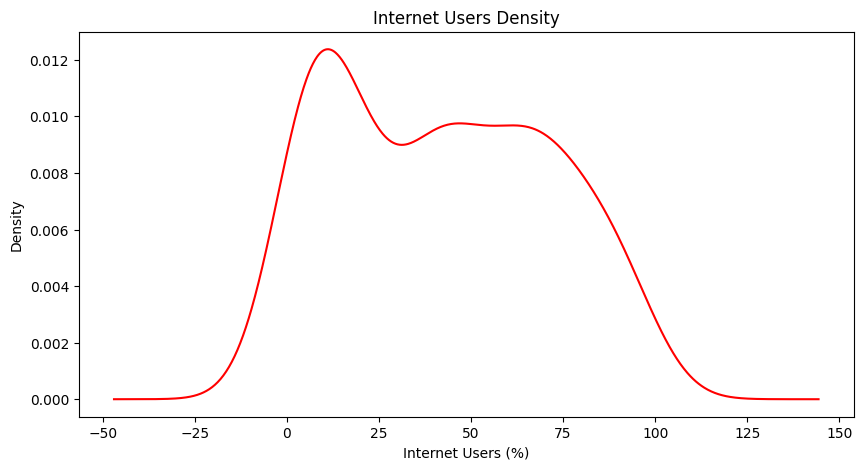

In [74]:
net['Birth rate'].plot(kind='kde', figsize=(10,5), title='Birth Rate Density')
plt.xlabel('Birth Rate')
plt.show()

net['Internet users'].plot(kind='kde', figsize=(10,5), color='red', title='Internet Users Density')
plt.xlabel('Internet Users (%)')
plt.show()

<h1 style='color:blue;'>Insight 12</h1>
<h3>Top 10 countries that births a lot LOL</h3>

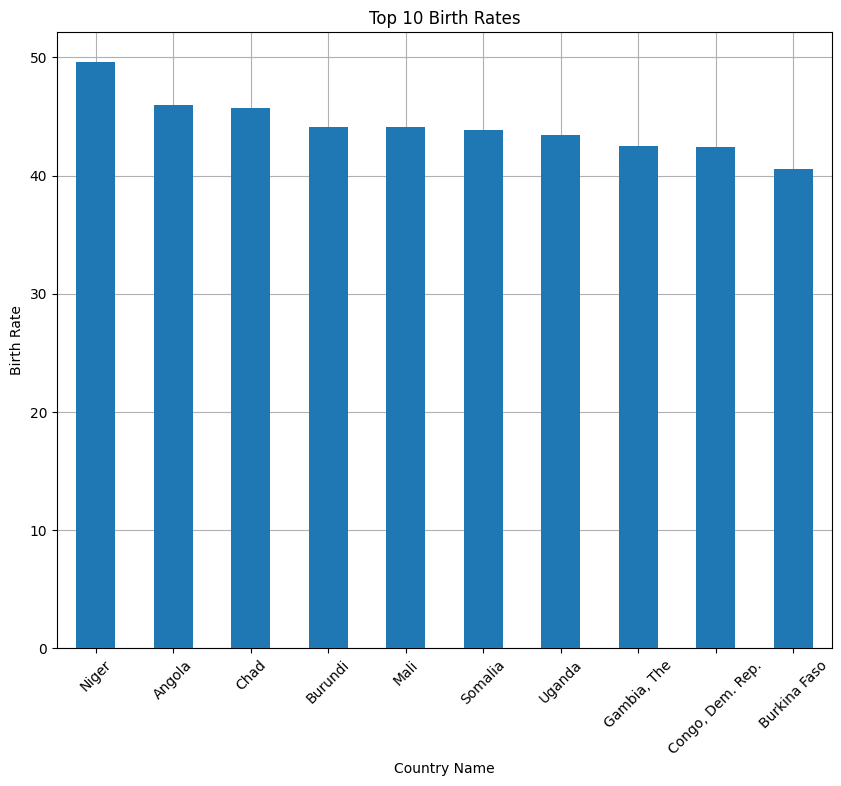

In [70]:
net.nlargest(10, 'Birth rate').set_index('Country Name')['Birth rate'].plot(kind='bar',figsize=(10,8), title='Top 10 Birth Rates', zorder=3)
plt.ylabel('Birth Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h1 style='color:blue;'>Insight 13</h1>
<h3>Average Internet Users in different Income Groups</h3>

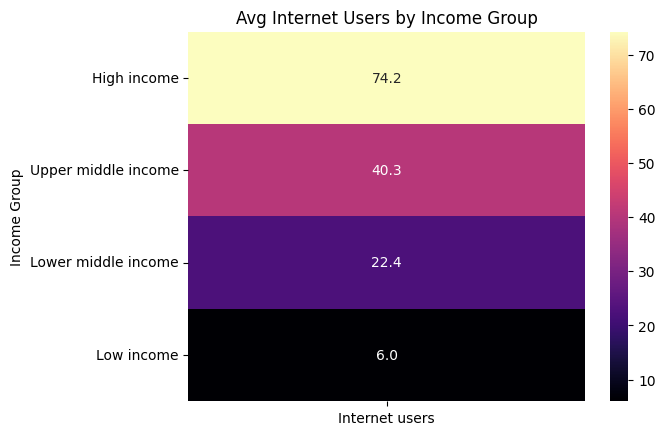

In [78]:
vis13 = net.pivot_table(index='Income Group', values='Internet users', aggfunc='mean').reindex(income_order)
sns.heatmap(vis13, annot=True, cmap='magma', fmt=".1f")
plt.title('Avg Internet Users by Income Group')
plt.show()

<h1 style='color:blue;'>Insight 14</h1>
<h3>Top 10 countries that consumes the internet</h3>

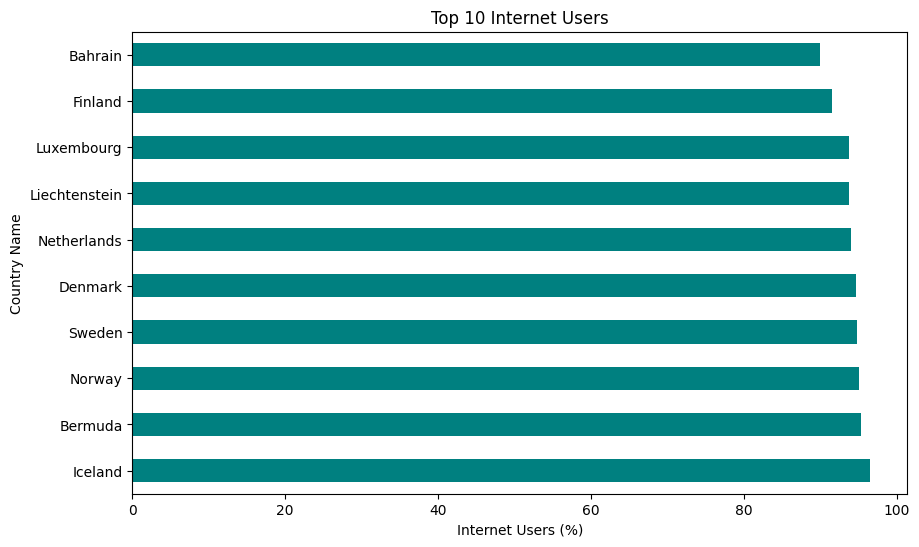

In [79]:
net.nlargest(10, 'Internet users').set_index('Country Name')['Internet users'].plot(
    kind='barh', title='Top 10 Internet Users', figsize=(10,6), color='teal')
plt.xlabel('Internet Users (%)')
plt.show()

<h1 style='color:blue;'>Insight 15</h1>
<h3>Mode Analysis</h3>

In [110]:
vis14 = pd.DataFrame({
    'Birth Rate Mode': [net['Birth rate'].mode()[0]],
    'Internet Users Mode': [net['Internet users'].mode()[0]]
})
print("\nMode Values:")
vis14


Mode Values:


,Birth Rate Mode,Internet Users Mode
0,10.2,35.0


<h1 style='color:blue;'>Insight 16</h1>
<h3>Birth Rate and Internet Users Summary</h3>

In [89]:
vis15 = net[['Birth rate', 'Internet users']].describe().round(1)
vis15

,Birth rate,Internet users
count,195.0,195.0
mean,21.5,42.1
std,10.6,29.0
min,7.9,0.9
25%,12.1,14.5
50%,19.7,41.0
75%,29.8,66.2
max,49.7,96.5


<h1 style='color:blue;'>Insight 17</h1>
<h3>Countries with No Internet Access</h3>

In [96]:
vis16 = net[net["Internet users"] == 0]
print("Countries with No Internet Access:", vis16)

Countries with No Internet Access: Empty DataFrame
Columns: [Country Name, Country Code, Birth rate, Internet users, Income Group]
Index: []


<h1 style='color:blue;'>Insight 18</h1>
<h3>Average of Birth Rate</h3>

In [99]:
vis17 = net["Birth rate"].mean()
print(f"Average Birth Rate: {vis17:.2f}")

Average Birth Rate: 21.47


<h1 style='color:blue;'>Insight 19</h1>
<h3>Distribution of Birth Rates</h3>

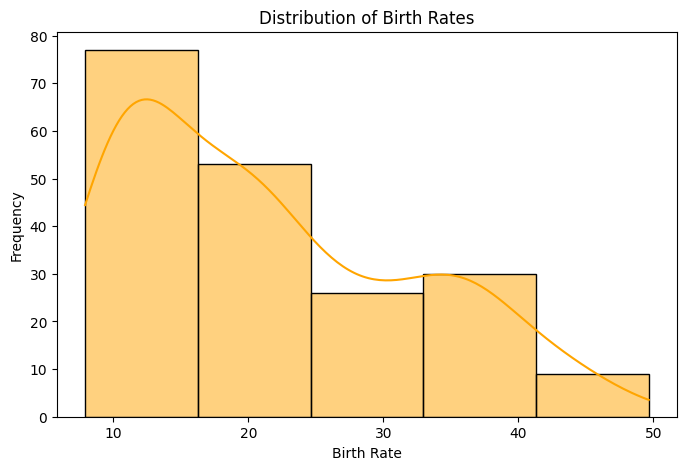

In [102]:
plt.figure(figsize=(8, 5))
sns.histplot(net["Birth rate"], bins=5, kde=True, color='orange')
plt.xlabel("Birth Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Birth Rates")
plt.show()

<h1 style='color:blue;'>Insight 20</h1>
<h3>Checking for Missing Values</h3>

In [108]:
vis20 = net.isnull().sum().reset_index()
vis20.columns = ['Column', 'Missing Values']
print("\nMissing Values Report:")
vis20


Missing Values Report:


,Column,Missing Values
0,Country Name,0
1,Country Code,0
2,Birth rate,0
3,Internet users,0
4,Income Group,0
